This notebook is simply to explore the ASL dataset, such as finding the original image size, how many images there are for each class, etc.

In [14]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import random
from pathlib import Path
from collections import Counter
from PIL import Image

In [ ]:
# define dataset path
DATA_DIR = Path(r"C:\Projects\ASL-Translator\data\raw\asl_alphabet\asl_alphabet_train\asl_alphabet_train")

In [4]:
# get class folders
classes = [d.name for d in DATA_DIR.iterdir() if d.is_dir()]
print(f"Found {len(classes)} classes:\n{classes}")

Found 29 classes:
['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [12]:
# Count images per class
image_counts = {cls: len(list((DATA_DIR / cls).glob("*.jpg"))) for cls in classes}
df_counts = pd.DataFrame.from_dict(image_counts, orient='index', columns=['count']).sort_values('count', ascending=False)
df_counts.describe()

,count
count,29.0
mean,3000.0
std,0.0
min,3000.0
25%,3000.0
50%,3000.0
75%,3000.0
max,3000.0


As we can see, every class has exactly 3000 images.

In [9]:
# Check image dimensions for a sample of images
sample_files = list(DATA_DIR.rglob("*.jpg"))[:1000]  # sample first 1,000 images for speed
dims = []

for file in sample_files:
    img = cv2.imread(str(file))
    if img is not None:
        h, w = img.shape[:2]
        dims.append((w, h))

df_dims = pd.DataFrame(dims, columns=['width', 'height'])
df_dims.describe()

,width,height
count,1000.0,1000.0
mean,200.0,200.0
std,0.0,0.0
min,200.0,200.0
25%,200.0,200.0
50%,200.0,200.0
75%,200.0,200.0
max,200.0,200.0


Each image is also of size $200 \times 200$.

In [11]:
# Summary statistics
print("📊 Dataset Summary")
print(f"Total classes: {len(classes)}")
print(f"Total images: {sum(df_counts['count'])}")
print(f"Image size:\n{df_dims.mean()}")

📊 Dataset Summary
Total classes: 29
Total images: 87000
Image size:
width     200.0
height    200.0
dtype: float64


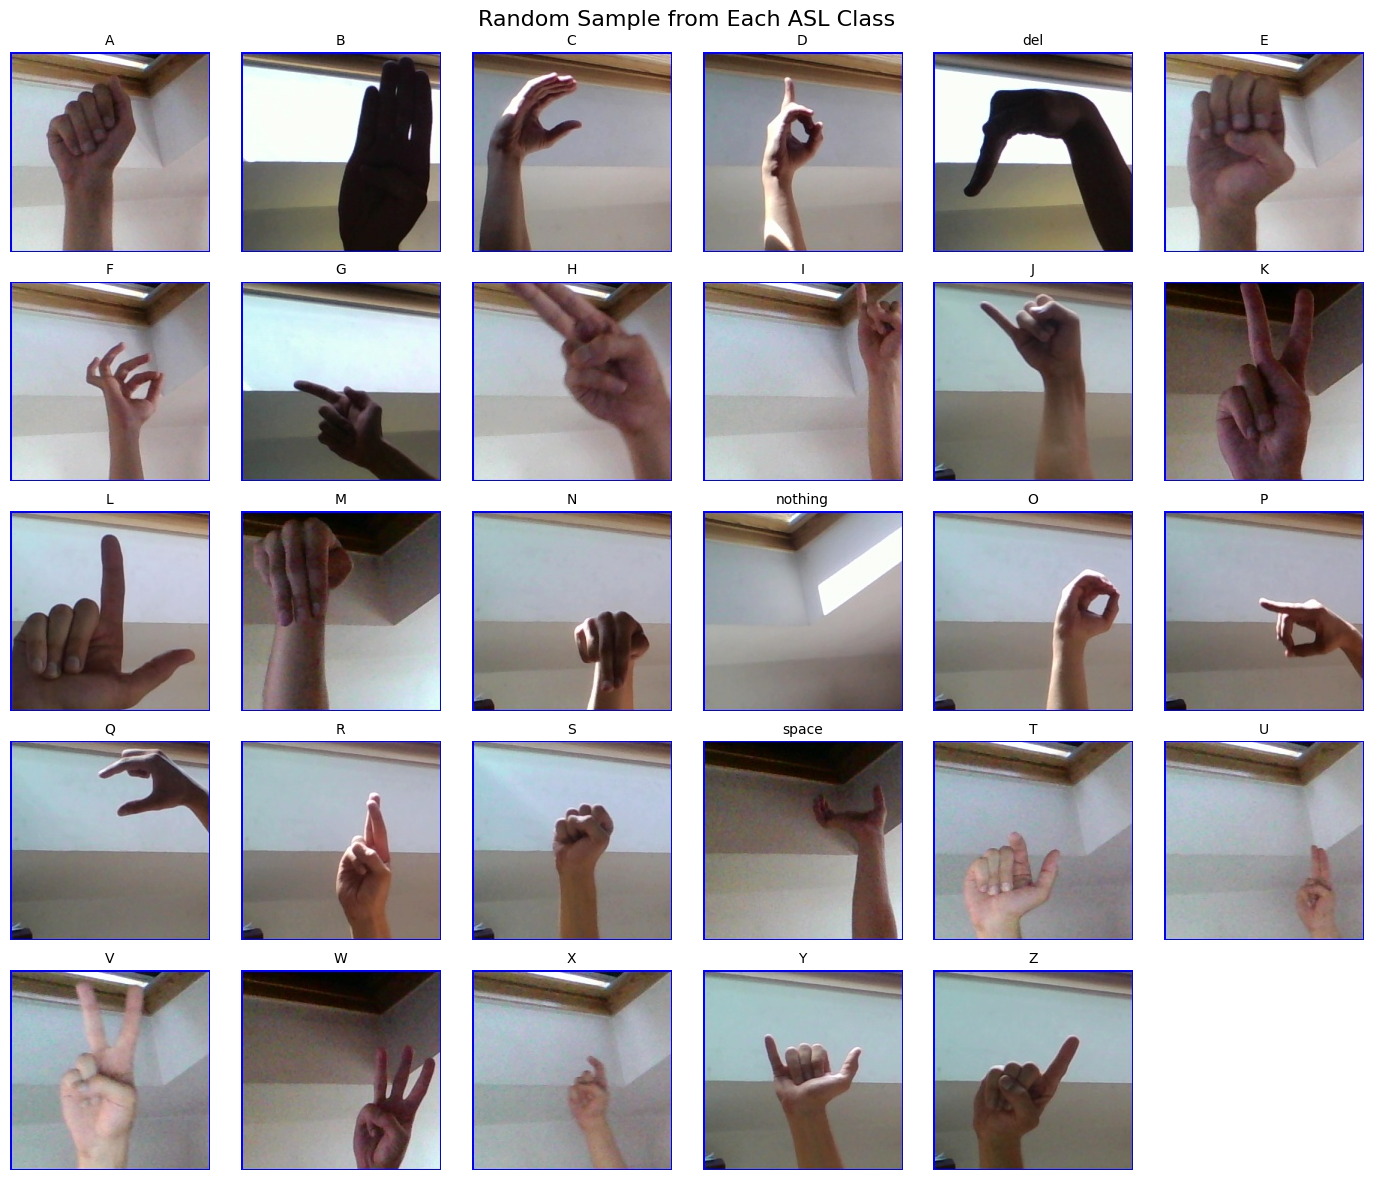

In [15]:
n_rows, n_cols = 5, 6
n_cells = n_rows * n_cols
total_classes = len(classes)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 12))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < total_classes:
        cls = classes[idx]
        img_path = random.choice(list((DATA_DIR / cls).glob("*.jpg")))
        img = Image.open(img_path).convert("RGB")
        ax.imshow(img)
        ax.set_title(cls, fontsize=10)
    else:
        ax.axis('off')  # leave bottom right empty
    
    ax.axis('off')

plt.suptitle("Random Sample from Each ASL Class", fontsize=16)
plt.tight_layout()
plt.show()
        